<a href="https://colab.research.google.com/github/emreonursal/courses/blob/master/AlgoritmikTradingCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***GEREKLİ OLAN KÜTÜPHANELERİN YÜKLENMESİ***

In [0]:
!pip install investpy #investing.com dan data çekmek için kullanılan kütüphane


In [0]:
import matplotlib.pyplot as plt # grafikler için kullanılan kütüphane.
import seaborn as sns #grafikler için kullanılır.
plt.rcParams["figure.figsize"] = (20,10)
import pandas as pd #Dataframe ve data serileri oluşturmak ve üzerinde analiz yapmak için kullanılır. Google da default gelir.
import numpy as np
import plotly.graph_objects as go
import investpy


from matplotlib.pyplot import figure


***GARANTI BANKASI HİSSE SENEDİ VERİSİNİN ALINMASI***

In [0]:
df = investpy.get_stock_historical_data(stock='GARAN',
                                        country='turkey',
                                        from_date='01/01/2010',
                                        to_date='19/11/2019')
print(df.tail())

             Open   High    Low  Close    Volume Currency
Date                                                     
2019-11-13   9.83   9.95   9.82   9.95  39890000      TRY
2019-11-14   9.81   9.95   9.72   9.74  51440000      TRY
2019-11-15   9.83   9.96   9.78   9.95  55460000      TRY
2019-11-18  10.01  10.21   9.98  10.14  64470000      TRY
2019-11-19  10.17  10.26  10.12  10.25  37480000      TRY


In [0]:
df.describe() #Toplam data miktarı ve temel istatistiklerin çıkarılması

,Open,High,Low,Close,Volume
count,2394.000000,2394.000000,2394.000000,2394.000000,2.394000e+03
mean,8.028496,8.133559,7.914411,8.016332,7.486853e+07
std,1.306990,1.315386,1.295409,1.303871,4.513289e+07
min,5.440000,5.540000,5.310000,5.400000,4.250000e+06
25%,7.080000,7.160000,6.980000,7.060000,4.181000e+07
50%,7.860000,7.960000,7.750000,7.850000,6.683000e+07
75%,8.840000,8.977500,8.730000,8.817500,9.842000e+07
max,12.440000,12.750000,12.050000,12.360000,4.152500e+08


***investing.com' dan ŞİRKET PROFİL BİLGİSİ ALMAK***


In [0]:
investpy.get_stock_company_profile(stock='bbva', country='spain', language='english')

{'desc': 'Banco Bilbao Vizcaya Argentaria, S.A. (BBVA) is a diversified financial company engaged in retail banking, wholesale banking, asset management and private banking. Its segments include Banking Activity in Spain, Real Estate Activity in Spain, the United States Turkey, Mexico, South America and Rest of Eurasia. Its Banking Activity in Spain segment includes Retail Network in Spain, Corporate and Business Banking (CBB), and BBVA Seguros and Asset Management units in Spain. Its Real Estate Activity in Spain segment covers specialist management of real-estate assets in the country. In the United States it offers services through, BBVA Compass Bancshares Inc. and the BBVA New York branch. The Turkey segment represents its stake in the Turkish bank, Turkiye Garanti Bankasi A.S. It offers banking and insurance businesses in Mexico. In South America, it provides banking and insurance businesses. The Rest of Eurasia segment includes business activity in the rest of Europe and Asia.',


***HISTORICAL DATA GRAFİĞİ***


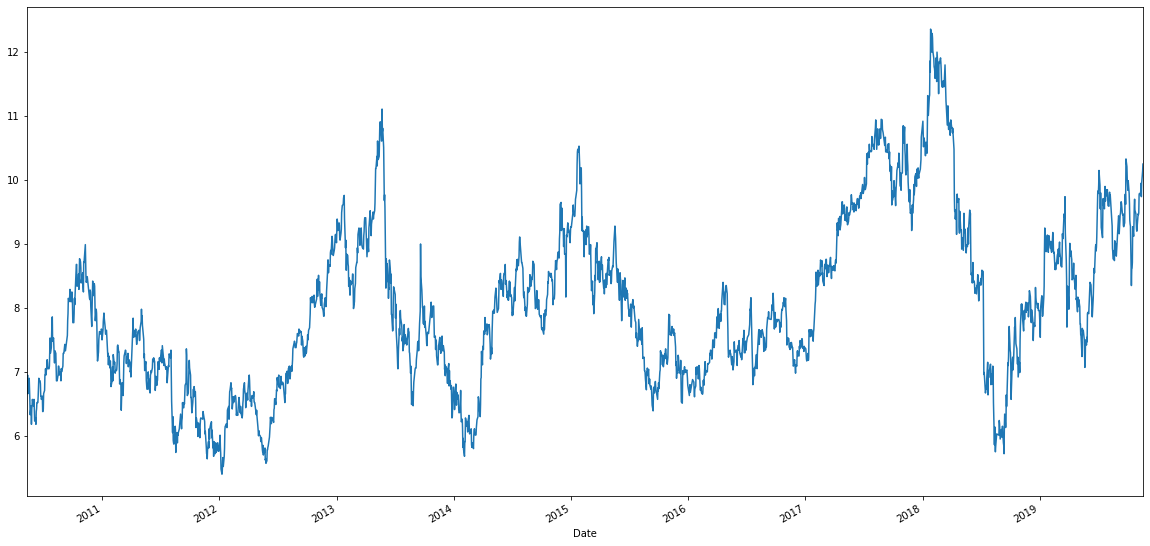

In [0]:
df['Close'].plot()
#df[['Close','Open','High','Low']].plot()
plt.show()


In [0]:
plt.close() 

***BİRDEN FAZLA HİSSE VERİSİ ÇEKME***


In [0]:
symbol_lists=['AKBNK',
              'GARAN',
              'HALKB',
              'ISCTR',
              'TSKB',
              'VAKBN',
              'YKBNK']

historical_data_dictionary={}




In [0]:
for element in symbol_lists:
  df = investpy.get_stock_historical_data(stock=element,
                                        country='turkey',
                                        from_date='01/01/2010',
                                        to_date='19/11/2019')
  historical_data_dictionary[element]=df

In [0]:
historical_data_dictionary['GARAN'].head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-05-11,6.62,6.66,6.47,6.66,21970000,TRY
2010-05-12,6.66,6.90,6.62,6.86,44610000,TRY
2010-05-13,6.95,7.09,6.90,6.95,34950000,TRY
2010-05-14,6.95,7.00,6.62,6.66,36070000,TRY
2010-05-17,6.57,6.86,6.52,6.81,34950000,TRY


In [0]:
historical_data_dictionary['AKBNK'].head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-05-04,7.20,7.30,7.06,7.11,6800000,TRY
2010-05-05,7.16,7.16,7.01,7.06,7820000,TRY
2010-05-06,7.06,7.16,7.01,7.06,5600000,TRY
2010-05-07,6.87,7.06,6.67,6.72,13540000,TRY
2010-05-10,7.06,7.20,7.01,7.16,11020000,TRY


***SIMPLE MOVING AVERAGE HESAPLAMA***

In [0]:
for element in symbol_lists:
  # Short moving window rolling mean
  historical_data_dictionary[element]['SMA21'] = historical_data_dictionary[element]['Close'].rolling(window=21).mean()

  # Long moving window rolling mean
  historical_data_dictionary[element]['SMA55'] = historical_data_dictionary[element]['Close'].rolling(window=55).mean()
  
  # Longest moving window rolling mean
  historical_data_dictionary[element]['SMA100'] = historical_data_dictionary[element]['Close'].rolling(window=100).mean()

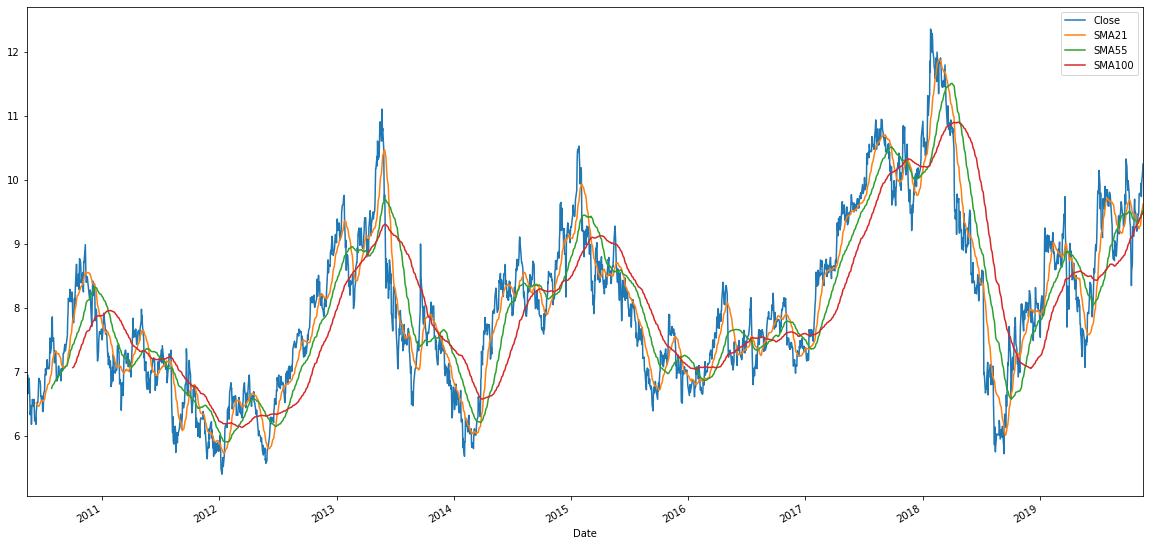

In [0]:
historical_data_dictionary['GARAN'][['Close', 'SMA21', 'SMA55','SMA100']].plot()
plt.show()

In [0]:
plt.close() 


***GÜNLÜK DEĞİŞİMLERİN HESAPLANMASI***

In [0]:
for element in symbol_lists:
  daily_close= historical_data_dictionary[element]['Close']
  daily_pct_change = daily_close.pct_change()
  daily_pct_change.fillna(0, inplace=True)
  historical_data_dictionary[element]['Change Price %']=daily_pct_change*100
  historical_data_dictionary[element]

historical_data_dictionary['GARAN'].tail()


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,Open,High,Low,Close,Volume,Currency,SMA21,SMA55,SMA100,Change Price %
Date,,,,,,,,,,
2019-11-13,9.83,9.95,9.82,9.95,39890000,TRY,9.389524,9.447636,9.4343,1.323829
2019-11-14,9.81,9.95,9.72,9.74,51440000,TRY,9.443333,9.463273,9.4464,-2.110553
2019-11-15,9.83,9.96,9.78,9.95,55460000,TRY,9.506667,9.484000,9.4597,2.156057
2019-11-18,10.01,10.21,9.98,10.14,64470000,TRY,9.574762,9.506545,9.4756,1.909548
2019-11-19,10.17,10.26,10.12,10.25,37480000,TRY,9.621429,9.525091,9.4886,1.084813


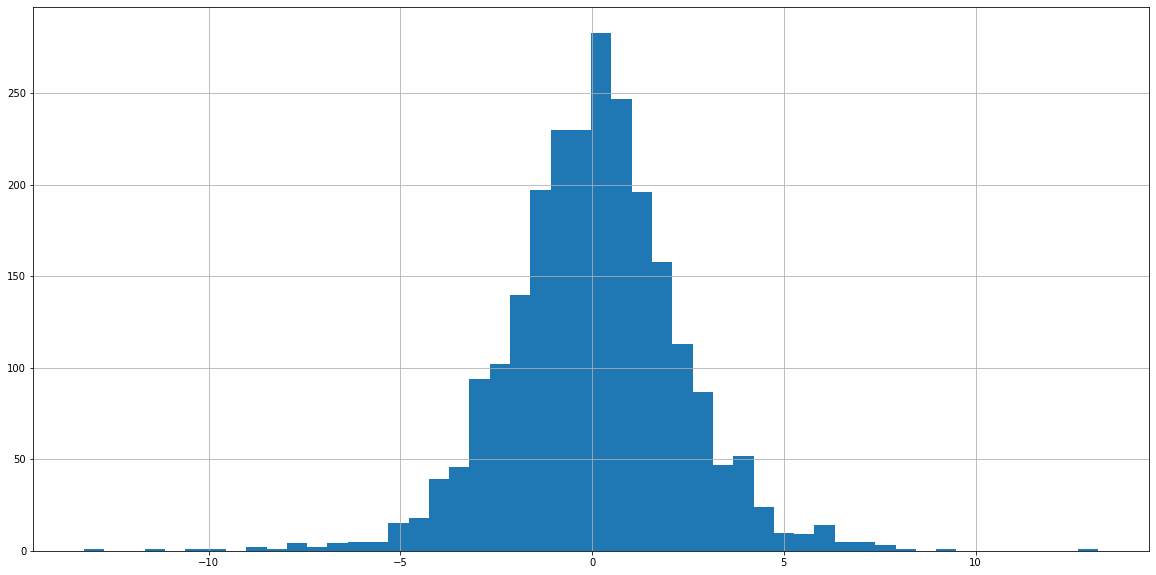

In [0]:
historical_data_dictionary['GARAN']['Change Price %'].hist(bins=50)
plt.show()

#200 defa 0 a yakın değerde kapatmış 
#-%5 ile %5 arasında sıklıkla kapanış yapıyor. 
#Max olarak %10 luk değişim yaşayabiliyor. 

In [0]:
plt.close() 


***STRATEJİ OLUŞTURMA***

In [0]:
historical_data_dictionary['GARAN'].tail()

,Open,High,Low,Close,Volume,Currency,SMA21,SMA55,SMA100,Change Price %
Date,,,,,,,,,,
2019-11-13,9.83,9.95,9.82,9.95,39890000,TRY,9.389524,9.447636,9.4343,1.323829
2019-11-14,9.81,9.95,9.72,9.74,51440000,TRY,9.443333,9.463273,9.4464,-2.110553
2019-11-15,9.83,9.96,9.78,9.95,55460000,TRY,9.506667,9.484000,9.4597,2.156057
2019-11-18,10.01,10.21,9.98,10.14,64470000,TRY,9.574762,9.506545,9.4756,1.909548
2019-11-19,10.17,10.26,10.12,10.25,37480000,TRY,9.621429,9.525091,9.4886,1.084813


In [0]:
historical_data_dictionary['GARAN']['Signals'] = np.where (historical_data_dictionary['GARAN']['SMA21'] > historical_data_dictionary['GARAN']['SMA55'],1.0,0.0)
historical_data_dictionary['GARAN'].tail()

,Open,High,Low,Close,Volume,Currency,SMA21,SMA55,SMA100,Change Price %,Signals
Date,,,,,,,,,,,
2019-11-13,9.83,9.95,9.82,9.95,39890000,TRY,9.389524,9.447636,9.4343,1.323829,0.0
2019-11-14,9.81,9.95,9.72,9.74,51440000,TRY,9.443333,9.463273,9.4464,-2.110553,0.0
2019-11-15,9.83,9.96,9.78,9.95,55460000,TRY,9.506667,9.484000,9.4597,2.156057,1.0
2019-11-18,10.01,10.21,9.98,10.14,64470000,TRY,9.574762,9.506545,9.4756,1.909548,1.0
2019-11-19,10.17,10.26,10.12,10.25,37480000,TRY,9.621429,9.525091,9.4886,1.084813,1.0


***İŞLEM EMİRLERİ OLUŞTURMA***

In [0]:
pd.options.mode.chained_assignment = None 
historical_data_dictionary['GARAN']['Positions']=historical_data_dictionary['GARAN']['Signals'].diff()
historical_data_dictionary['GARAN']['Marker']=historical_data_dictionary['GARAN'].apply(lambda x: 'BUY' if x['Positions']==1 else 'SELL' if x['Positions']==-1 else 'None' ,axis=1)
historical_data_dictionary['GARAN']['Marker_Color']=historical_data_dictionary['GARAN'].apply(lambda x: 'green' if x['Marker']=='BUY' else 'red' if x['Marker']=='SELL' else 'None' ,axis=1)
executionMarkers=historical_data_dictionary['GARAN'][historical_data_dictionary['GARAN']['Marker'] != 'None']
executionMarkers[['Close','Marker']].tail(10)

,Close,Marker
Date,,
2017-11-29,9.33,SELL
2018-01-02,10.92,BUY
2018-03-22,10.97,SELL
2018-10-03,7.11,BUY
2019-03-29,8.34,SELL
2019-06-26,8.89,BUY
2019-09-03,9.37,SELL
2019-09-27,10.33,BUY
2019-10-31,9.20,SELL


In [0]:
fig = go.Figure()

fig.data = []
fig.add_trace(go.Candlestick(x=historical_data_dictionary['GARAN'].index,
                open=historical_data_dictionary['GARAN']['Open'],
                high=historical_data_dictionary['GARAN']['High'],
                low=historical_data_dictionary['GARAN']['Low'],
                close=historical_data_dictionary['GARAN']['Close'],name="OHLC"))

fig.add_trace(go.Scatter(x=historical_data_dictionary['GARAN'].index, y=historical_data_dictionary['GARAN']['SMA21'], name="SMA21",
                         line_color='blue'))
fig.add_trace(go.Scatter(x=historical_data_dictionary['GARAN'].index, y=historical_data_dictionary['GARAN']['SMA55'], name="SMA55",
                         line_color='orange'))

fig.add_trace(go.Scatter(x=executionMarkers.index, y=executionMarkers.Close, mode='markers', marker=dict(size=[20]*len(executionMarkers),
                color=executionMarkers.Marker_Color)))

fig.update_layout(title_text='GARAN',
                  xaxis_rangeslider_visible=True,
                   width=1800, height=900)
fig.show()

***BACKTESTING***


In [0]:
#Başlangıç teminatı belirledik
initial_capital= float(100000.0)

#Pozisyonlar için dataframe oluşturduk
positions = pd.DataFrame(index=historical_data_dictionary['GARAN'].index).fillna(0.0)

#Her işlemde 100 birim hisse aldık
positions['GARAN'] = 100*historical_data_dictionary['GARAN']['Signals'] 
#
portfolio = positions.multiply(historical_data_dictionary['GARAN']['Close'], axis=0)
pos_diff = positions.diff()

portfolio['Holdings'] = (positions.multiply(historical_data_dictionary['GARAN']['Close'], axis=0)).sum(axis=1)
portfolio['Cash'] = initial_capital - (pos_diff.multiply(historical_data_dictionary['GARAN']['Close'], axis=0)).sum(axis=1).cumsum() 
portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']
portfolio['Returns'] = portfolio['Total'].pct_change()
print(portfolio.tail())

             GARAN  Holdings      Cash     Total  Returns
Date                                                     
2019-11-13     0.0       0.0  100170.0  100170.0  0.00000
2019-11-14     0.0       0.0  100170.0  100170.0  0.00000
2019-11-15   995.0     995.0   99175.0  100170.0  0.00000
2019-11-18  1014.0    1014.0   99175.0  100189.0  0.00019
2019-11-19  1025.0    1025.0   99175.0  100200.0  0.00011


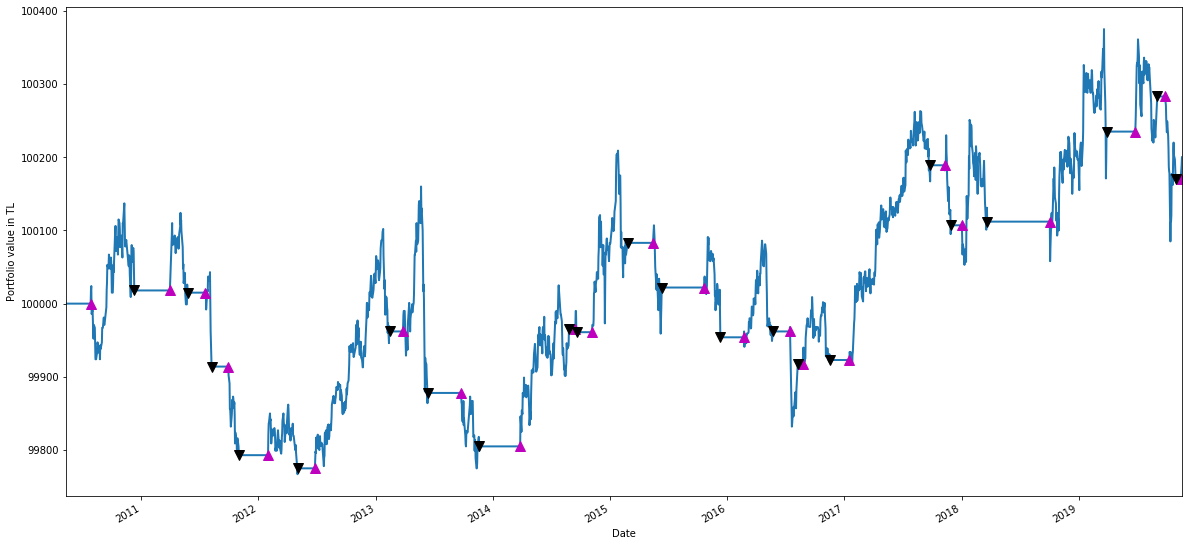

In [0]:

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in TL')


portfolio['Total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[historical_data_dictionary['GARAN'].Positions == 1.0].index, 
         portfolio.Total[historical_data_dictionary['GARAN'].Positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[historical_data_dictionary['GARAN'].Positions == -1.0].index, 
         portfolio.Total[historical_data_dictionary['GARAN'].Positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

In [0]:
Returns = portfolio['Returns']

# Yıllık Sharpe Ratio
sharpe_ratio = np.sqrt(252) * (Returns.mean() / Returns.std())

print(sharpe_ratio)

0.10028850916085713


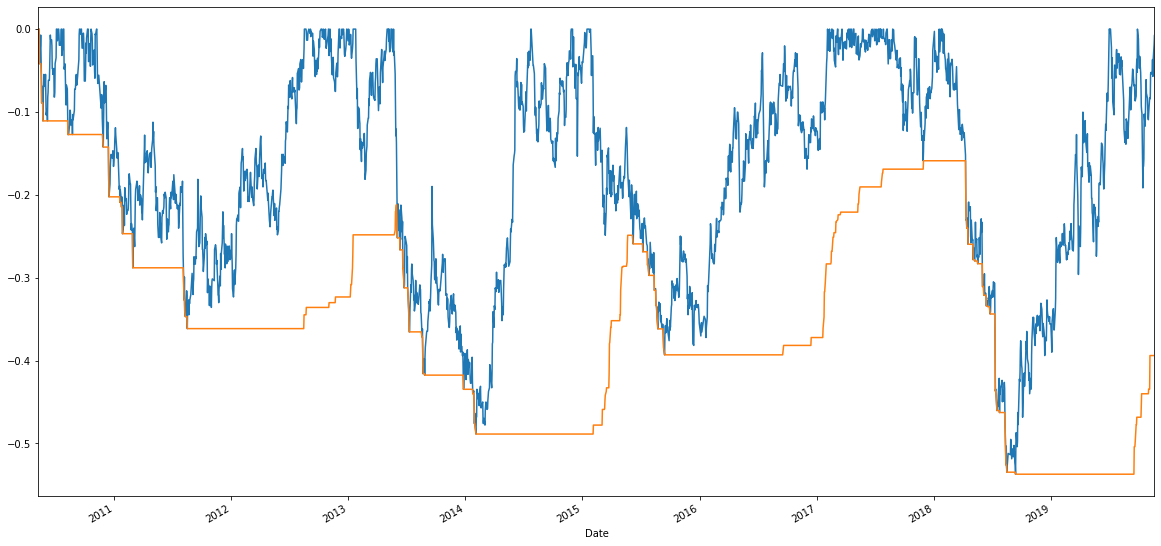

In [0]:
# Son 1 Yıllık hareket
window = 252

rolling_max = historical_data_dictionary['GARAN']['Close'].rolling(window, min_periods=1).max()
daily_drawdown = historical_data_dictionary['GARAN']['Close']/rolling_max - 1.0

# Günlük minimum drawndown hesaplaması
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Sonucların grafiği
daily_drawdown.plot()
max_daily_drawdown.plot()

plt.show()